In [1]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [4]:
clauses = []
C = 1
mymap = {}
n = 0
def varnum(i, j):
    global n
    x =  i * n + j
    global C
    if not x in mymap:
        mymap[x] = C
        C += 1
    return x

n, m = map(int, input().split())

nodes = range(1, n + 1)

mymap = {}

for i in nodes:
    for j in nodes:
        if i != j:
            mymap[(i, j)] = 0

#each node j must appear in the path
for j in nodes:
    clauses.append([varnum(i, j) for i in nodes])

#no node j appears twice in the path
for i in nodes:
    for k in nodes:
        if i < k:
            for j in nodes:
                clauses.append([-varnum(i, j), -varnum(k, j)])


#every position i on the path must be occupied
for i in nodes:
    clauses.append([varnum(i, j) for j in nodes])


#no two nodes j and k occupy the same postion in the path
for j in nodes:
    for k in nodes:
        if j < k:
            for i in nodes:
                clauses.append([-varnum(i, j), -varnum(i, k)])



for _ in range(m):
    u, v = map(int, input().split())
    mymap[(u, v)] = 1
    #mymap[(v, u)] = 1

for i in nodes:
    for j in nodes:
        if (i, j) in mymap:
            if mymap[(i, j)] == 0:
                for k in range(1, n):
                    clauses.append([-varnum(k, i), -varnum(k + 1, j)])
                clauses.append([-varnum(n, i), -varnum(1, j)])

count = len(clauses)
for x in clauses:
    for y in x:
        p = mymap[abs(y)]
        if y < 0:
            p *= -1
        print (p , end = " ")
    print ('0')
print(count)

2 1
1 2
1 2 0
3 4 0
-1 -2 0
-3 -4 0
1 3 0
2 4 0
-1 -3 0
-2 -4 0
-3 -2 0
-4 -1 0
10


In [2]:
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 4 8
1 2 0
3 4 0
-1 -2 0
-3 -4 0
1 3 0
2 4 0
-1 -3 0
-2 -4 0
'''

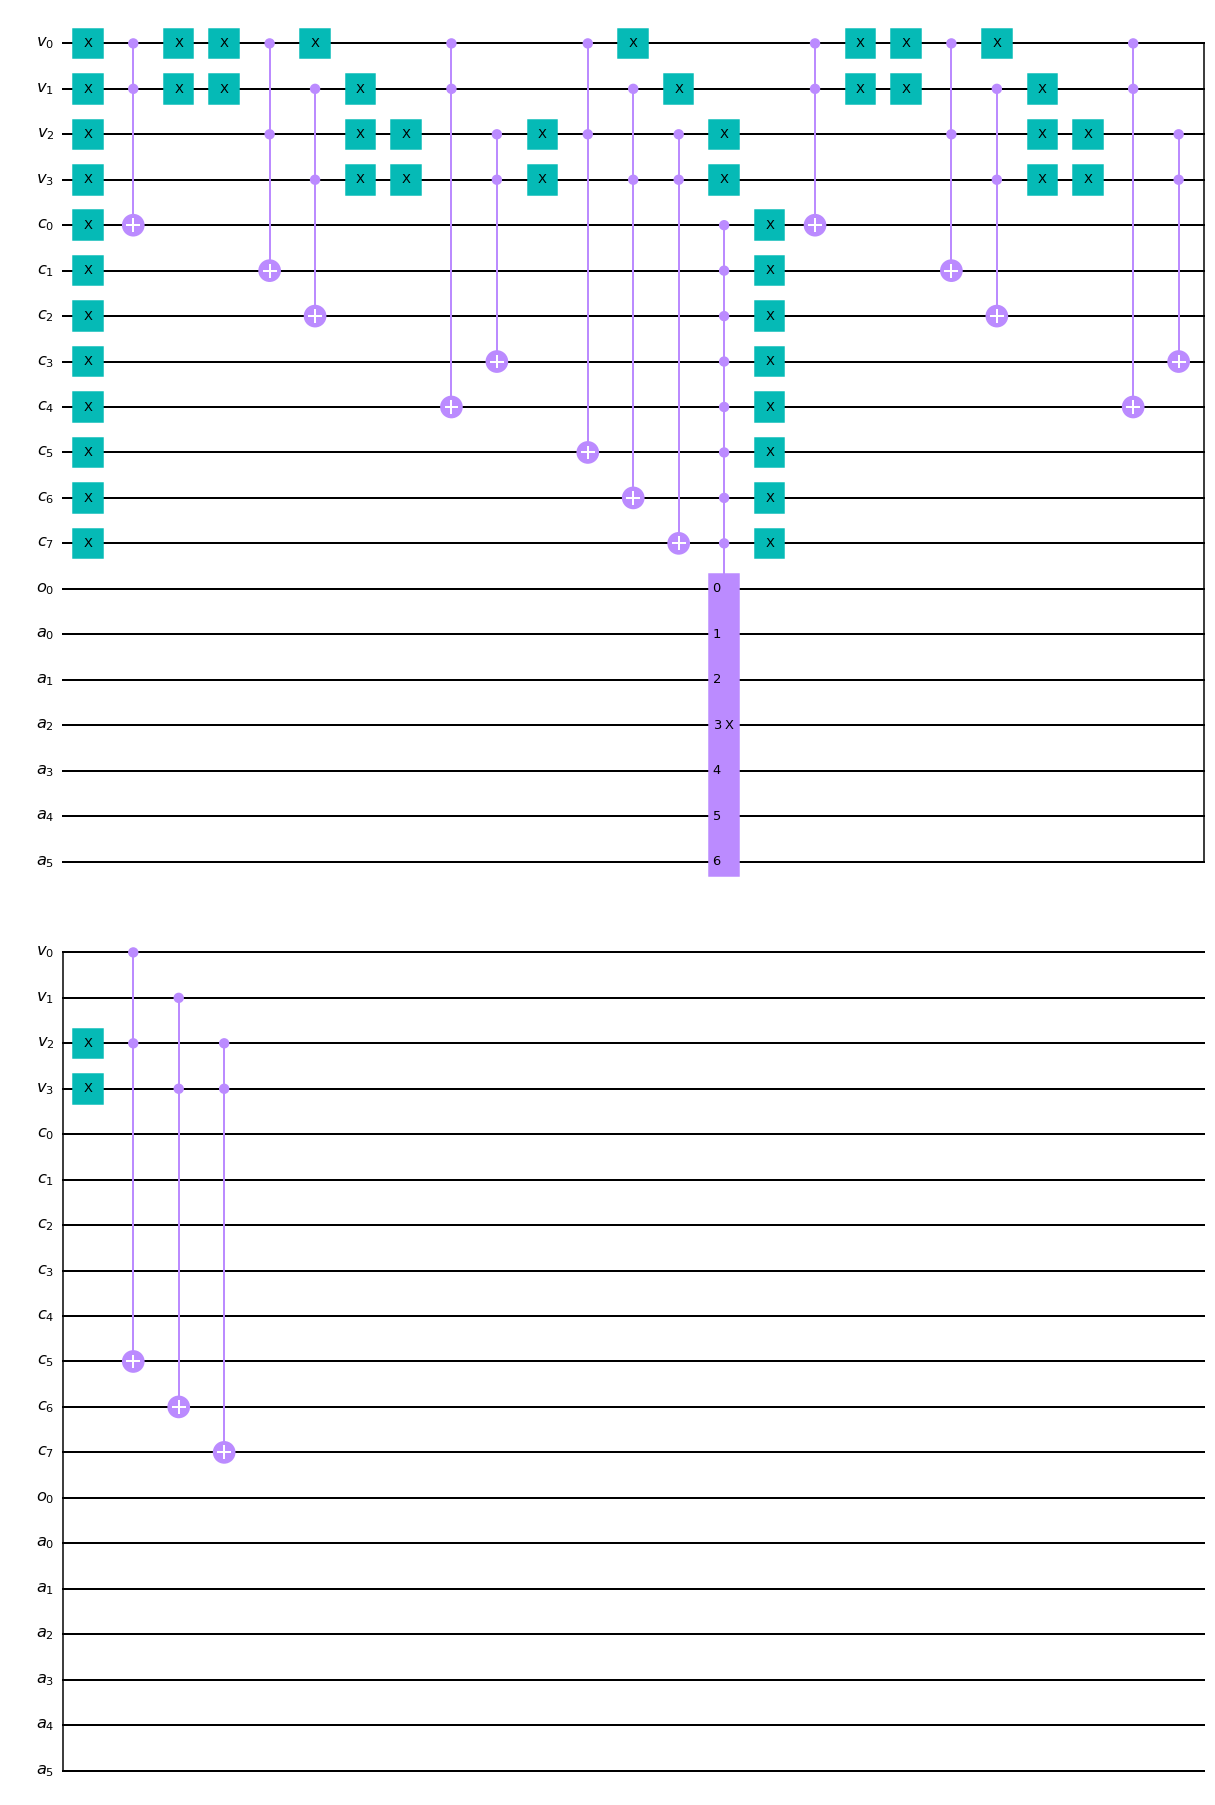

In [3]:
oracle = LogicalExpressionOracle(input_3sat)
oracle.circuit.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',


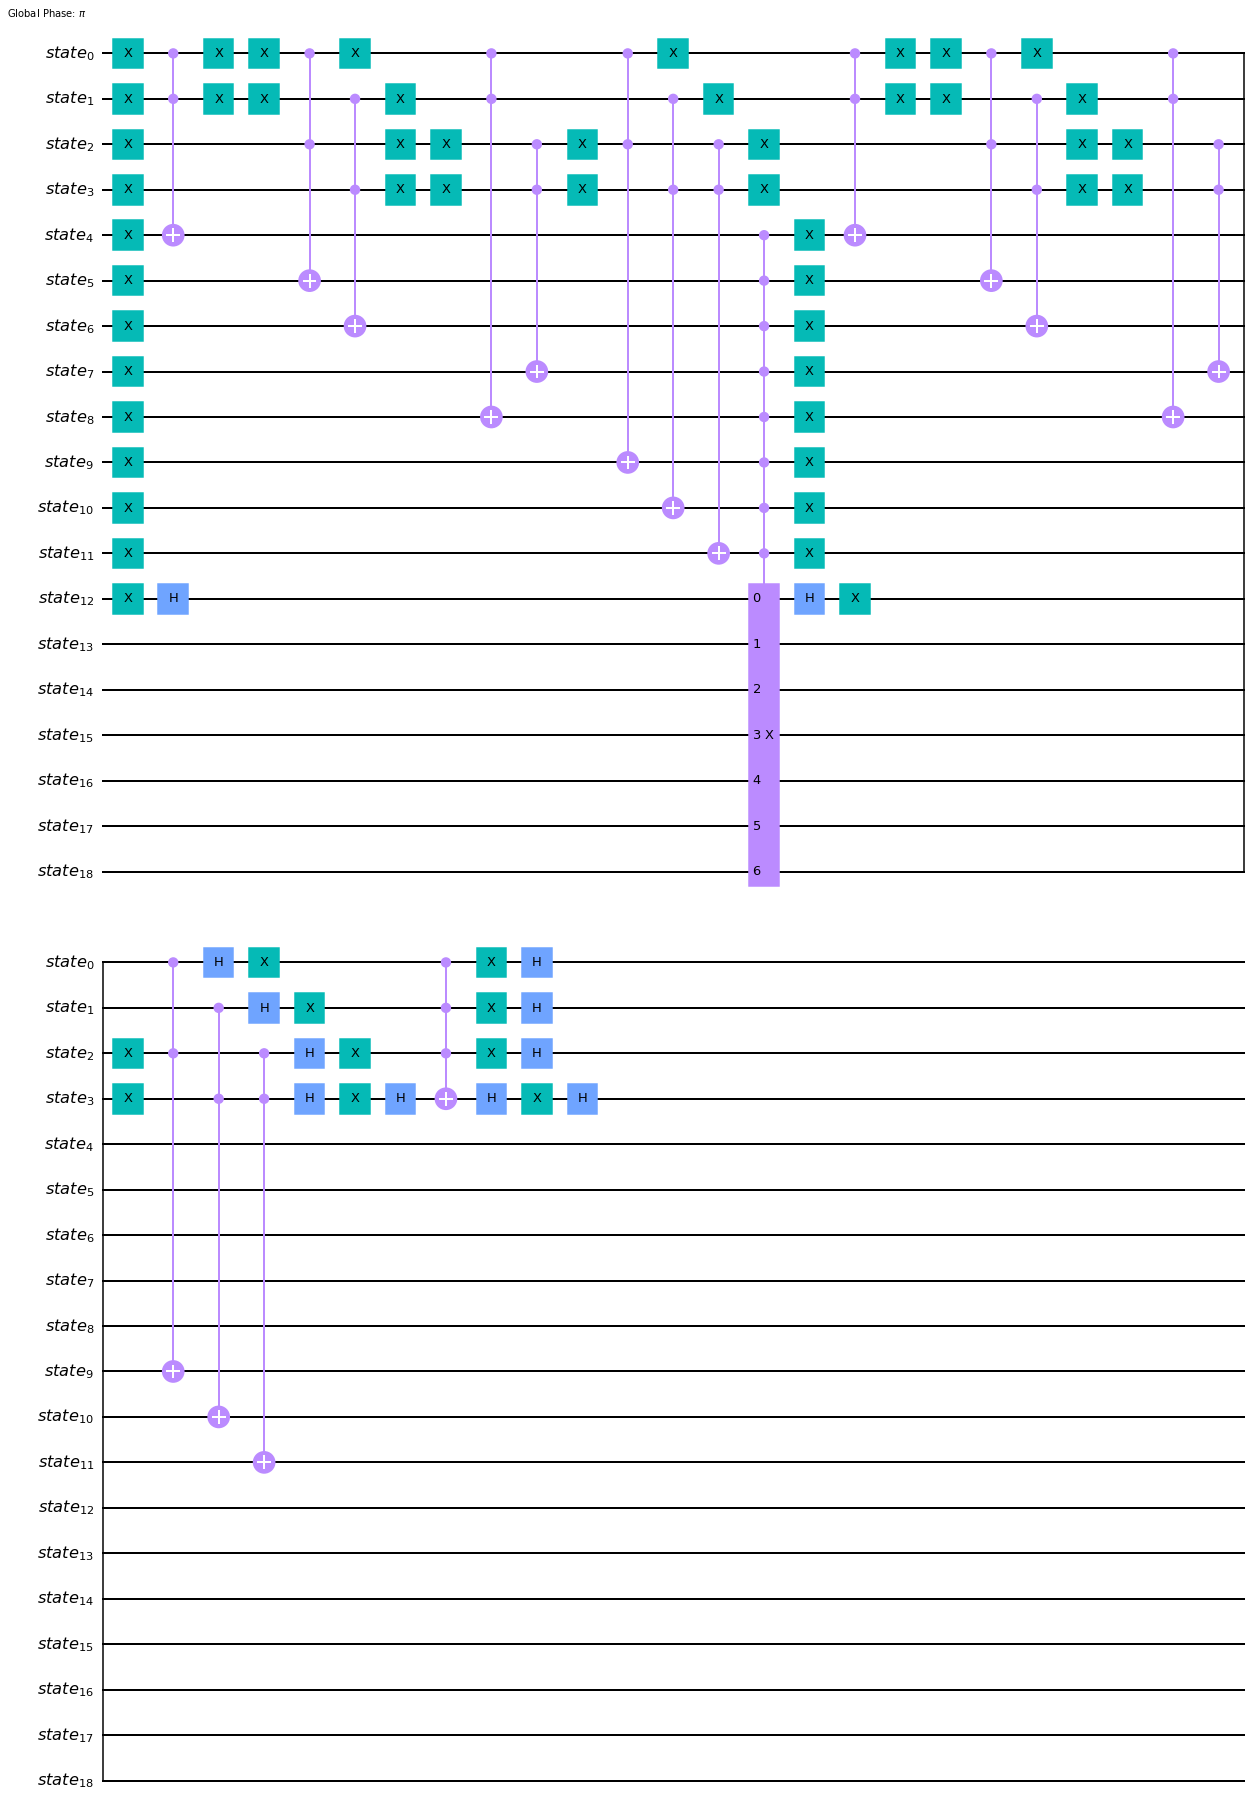

In [4]:
grover = Grover(oracle)
#grover.grover_operator.draw()

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['assignment'])

/opt/conda/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',


[-1, 2, 3, -4]


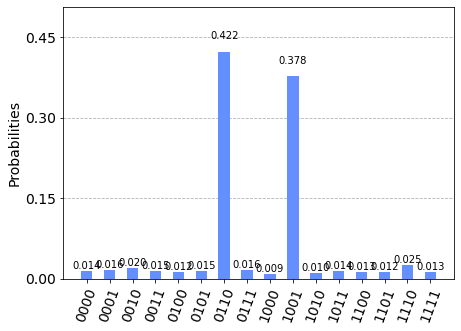

In [6]:
plot_histogram(result['measurement'])